In [1]:
import sympy as sp
from rrop import TP, Sum, mysimplify, k, c, d, x, y, xy, yx, canonical_expr, split_commutative

sp.init_printing()

In [2]:
q = sp.symbols('q')

In [3]:
Y = TP(y, 1) + TP(1, y)
X = TP(x, 1) + TP(1, x)

Phi1 = Sum(TP((y*x)**q, (x*y)**(k - 1 - q)), (q, 0, k - 1))
Phi2 = -TP(x, 1) - TP(1, x) + Sum(TP(y * (x*y)**q, y * (x*y)**(k - 2 - q)), (q, 0, k - 2))

lbda = TP(x, 1) * Phi1
mu = Sum(TP((x*y)**q, y*(x*y)**(k - 1 - q)), (q, 0, k - 1))

rho = TP(x * yx**(k-1), 1) + TP(1, x * yx**(k-1))
psi = TP(yx**(k-1), xy**(k-1))
tau = Y * X

sigma = X * Phi1

omega = TP((1 + c*x) * yx**(k-1), xy**k)

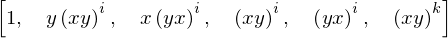

In [13]:
i = sp.symbols('i')

basis = [
    1,
    y*xy**i, x*yx**i, # i=0..k-1
    xy**i, yx**i, # i=1..k-1
    xy**k
]
basis

In [5]:
def act1(a, r):
    return canonical_expr(a.args[0] * r * a.args[1])

def act(a, r):
    assert isinstance(a, TP) or isinstance(a, sp.Add) or isinstance(a, Sum) or isinstance(a, sp.Mul)
    assert isinstance(r, sp.Mul) or isinstance(r, sp.Pow) or isinstance(r, sp.Symbol) or isinstance(r, int)
    
    if isinstance(a, TP):
        return act1(a, r)
    elif isinstance(a, Sum):
        inner = act1(a.function, r)
        return Sum(inner, a.limits[0])
    elif isinstance(a, sp.Mul):
        commutative, other = split_commutative(a)
        return commutative * act(sp.Mul(*other), r)
    else:
        return sp.Add(*[act(arg, r) for arg in a.args])

In [6]:
l = [(b, (act(Y, b), act(X, b))) for b in basis]

In [7]:
d0 = sp.Matrix([[Y, X]])
d0

[(1⊗y) + (y⊗1)  (1⊗x) + (x⊗1)]

In [8]:
d1 = sp.Matrix([
    [Y + d * lbda, Phi1 + c * lbda],
    [d * mu, Phi2 + c * mu]
])
d1

⎡  k - 1                                                      k - 1           
⎢   ____                                                       ____           
⎢   ╲                                                          ╲              
⎢    ╲          (       q                                       ╲          (  
⎢     ╲  x⋅(y⋅x) ⊗     k - q - 1                                 ╲  x⋅(y⋅x) ⊗ 
⎢d⋅   ╱      (x⋅y)         )     + (1⊗y) + (y⊗1)            c⋅   ╱      (x⋅y) 
⎢    ╱                                                          ╱             
⎢   ╱                                                          ╱              
⎢   ‾‾‾‾                                                       ‾‾‾‾           
⎢  q = 0                                                      q = 0           
⎢                                                                             
⎢          k - 1                                    k - 1                     
⎢           ____                                    

In [9]:
d1.col(0)

⎡  k - 1                                        ⎤
⎢   ____                                        ⎥
⎢   ╲                                           ⎥
⎢    ╲          (       q                       ⎥
⎢     ╲  x⋅(y⋅x) ⊗     k - q - 1                ⎥
⎢d⋅   ╱      (x⋅y)         )     + (1⊗y) + (y⊗1)⎥
⎢    ╱                                          ⎥
⎢   ╱                                           ⎥
⎢   ‾‾‾‾                                        ⎥
⎢  q = 0                                        ⎥
⎢                                               ⎥
⎢          k - 1                                ⎥
⎢           ____                                ⎥
⎢           ╲                                   ⎥
⎢            ╲           (     q                ⎥
⎢             ╲  (x⋅y) ⊗       k - q - 1        ⎥
⎢        d⋅   ╱     y⋅(x⋅y)         )           ⎥
⎢            ╱                                  ⎥
⎢           ╱                                   ⎥
⎢           ‾‾‾‾                                ⎥


In [8]:
from IPython.display import display

In [11]:
def multiply_row_by_col(row, col):
    return canonical_expr(sum(act(c, r) for r, c in zip(row, col)))

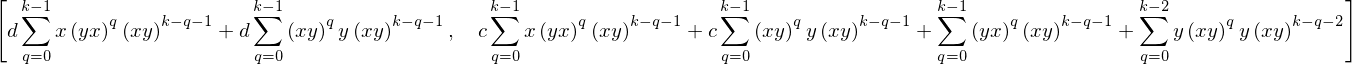

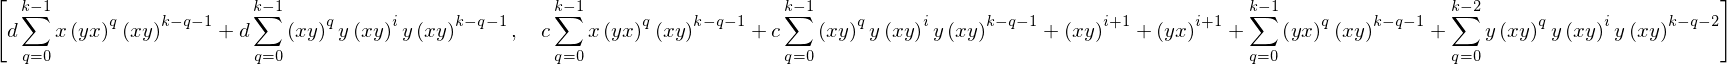

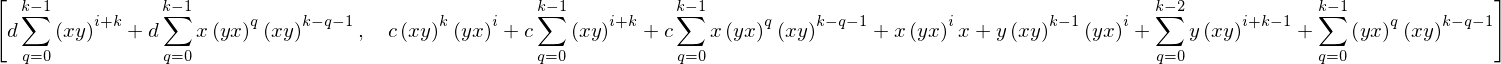

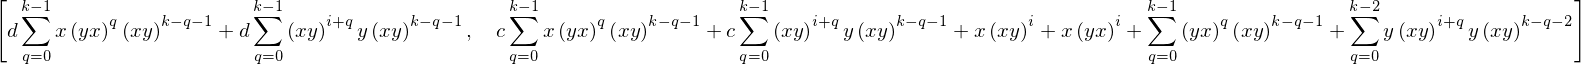

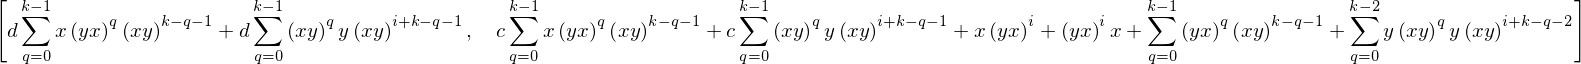

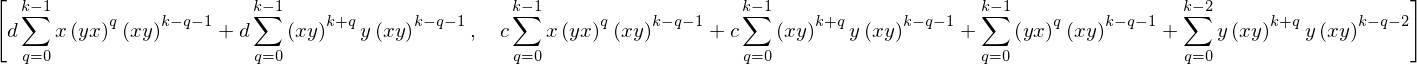

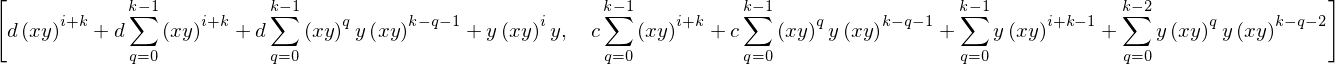

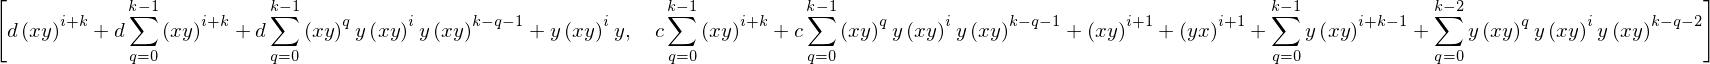

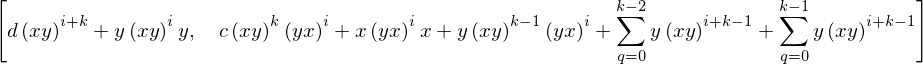

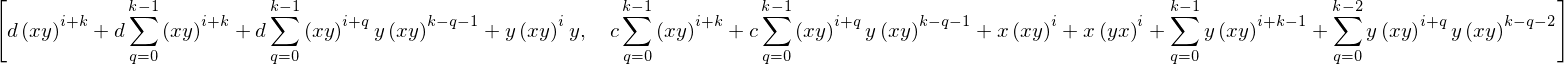

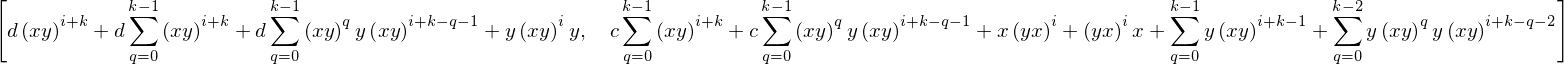

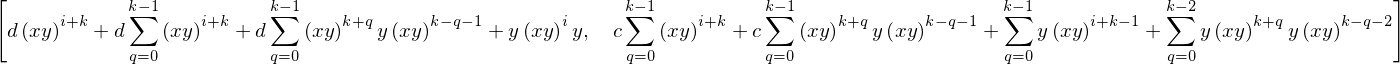

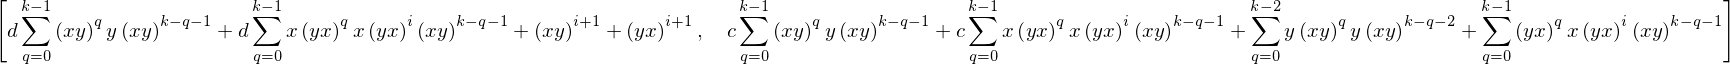

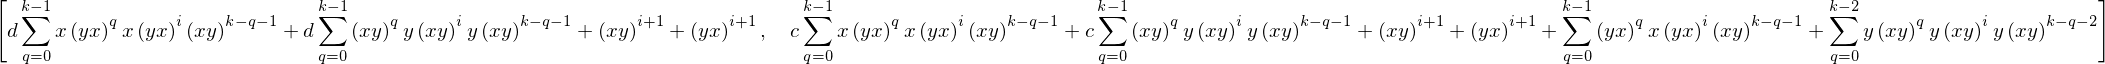

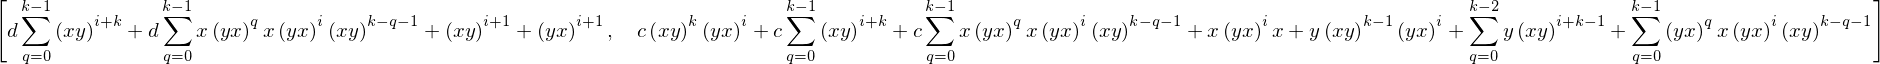

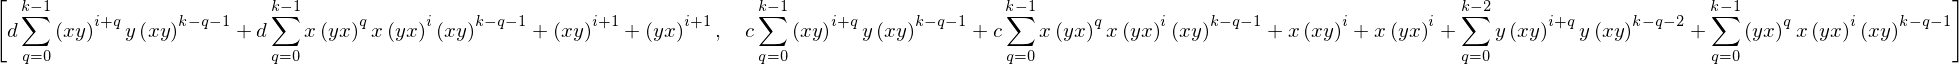

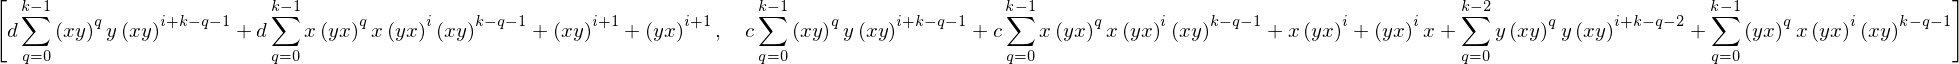

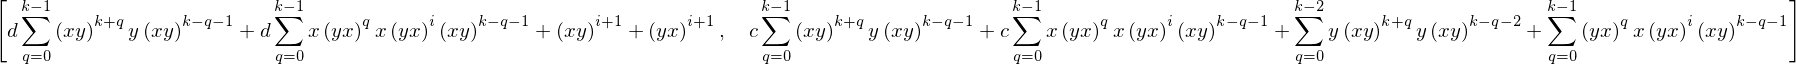

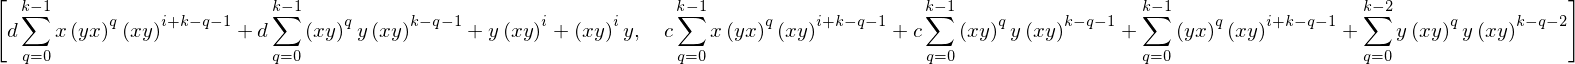

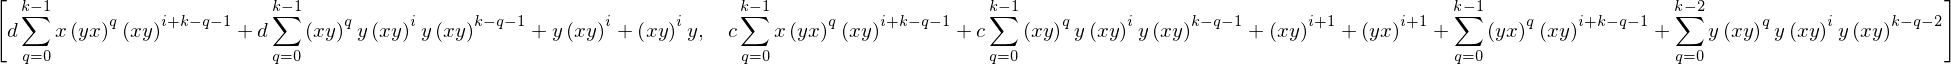

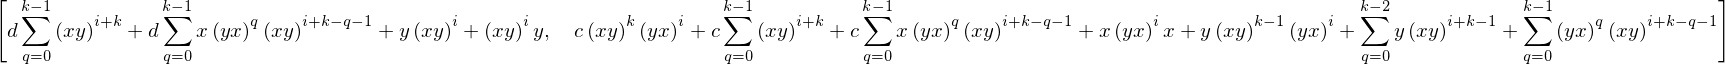

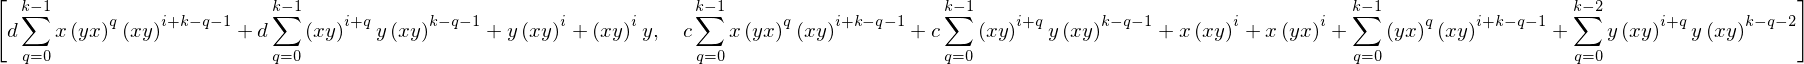

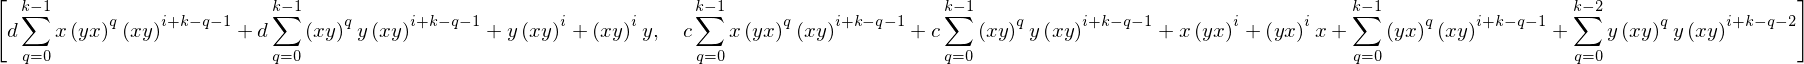

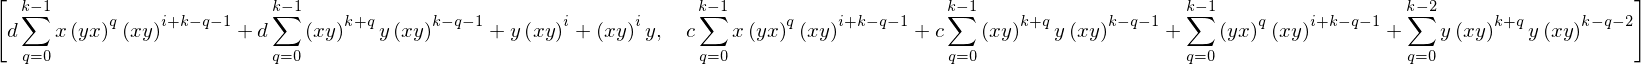

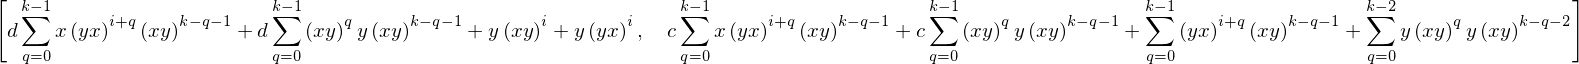

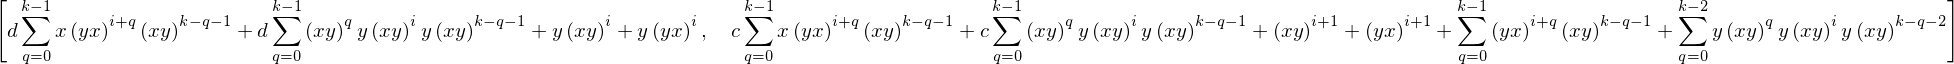

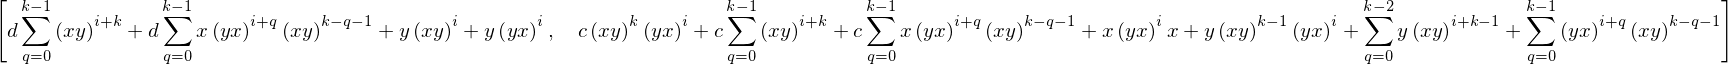

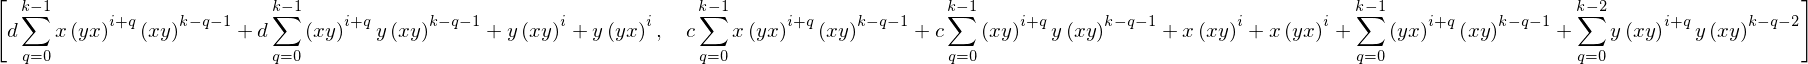

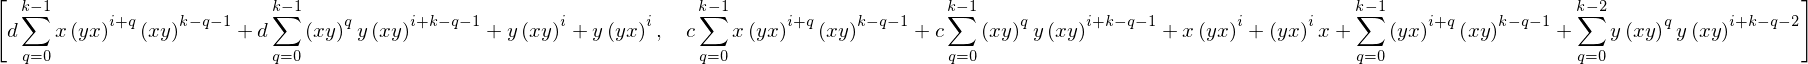

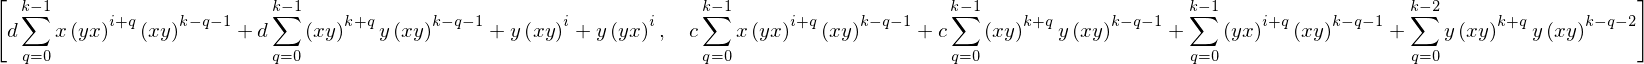

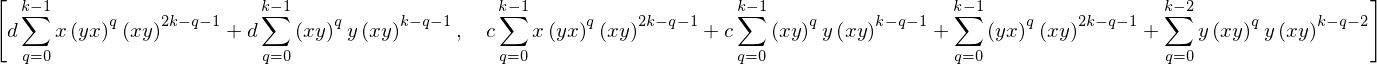

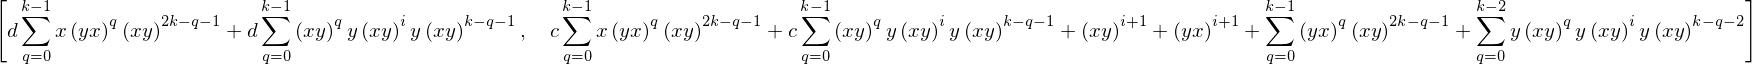

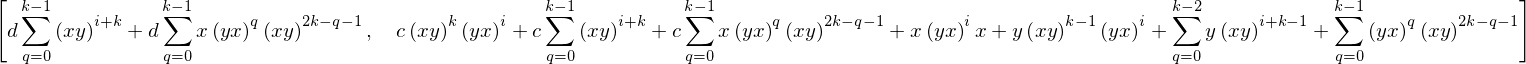

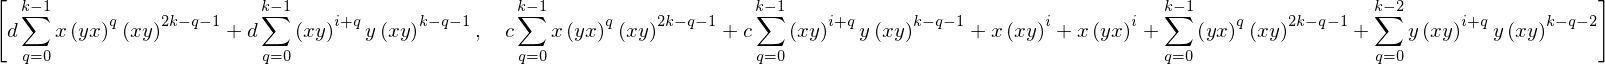

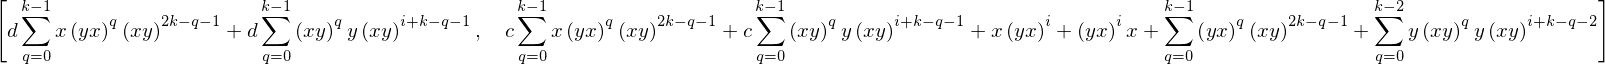

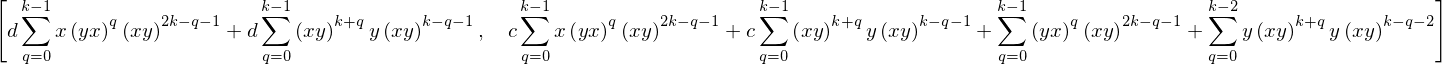

In [14]:
for r1 in basis:
    for r2 in basis:
        r = (r1, r2)
        result = [multiply_row_by_col(r, d1.col(i)) for i in (0, 1)]
        display(result)

In [16]:
from cohomology import ast_table, B, expand_with_transformers, ast, basis

In [13]:
import sympy as sp
sp.init_printing()

In [17]:
expr = expand_with_transformers(B)
expr

 2                                                                      
c ⋅d⋅ (     k  + c⋅d⋅(x⊗x⋅y) + c⋅d⋅ (       k - 1  + d⋅(1⊗x⋅y) + d⋅(x⊗y)
     (x⋅y) ⊗y)                     y⋅(x⋅y)     ⊗y)                      

In [21]:
def display_for(r):
    product = ast(expr, r)
    product_expanded = expand_with_transformers(product)
    display(r)
    display(product_expanded)
    # print('({}) ∗ {} = {} → {}'.format(expr, r, product, product_expanded))

display_for(basis[1])

# for r in basis:
#     display_for(r)

TypeError: cannot determine truth value of Relational

TypeError: cannot determine truth value of Relational

TypeError: cannot determine truth value of Relational

TypeError: cannot determine truth value of Relational

TypeError: cannot determine truth value of Relational

TypeError: cannot determine truth value of Relational

In [22]:
dir(basis[1])

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_add',
 '_args',
 '_assumptions',
 '_compare_pretty',
 '_eval_coeff',
 '_eval_rewrite',
 '_eval_subs',
 '_explicit_class_assumptions',
 '_has',
 '_has_matcher',
 '_hashable_content',
 '_intersect_interval',
 '_ith_point',
 '_mhash',
 '_mul',
 '_op_priority',
 '_prop_handler',
 '_recursive_call',
 '_sorted_args',
 '_start_key',
 '_subs',
 '_xreplace',
 'args',
 'as_content_primitive',
 'as_poly',
 'assumptions0',
 'atoms',
 'canonical_variabl

In [26]:
for attr in dir(basis[1]):
    if not attr.startswith('_') and not attr.startswith('is_'):
        print('%s → %s' % (attr, getattr(basis[1], attr)))

args → (y*(x*y)**i, (i, 0, k - 1))
as_content_primitive → <bound method Basic.as_content_primitive of SeqFormula(y*(x*y)**i, (i, 0, k - 1))>
as_poly → <bound method Basic.as_poly of SeqFormula(y*(x*y)**i, (i, 0, k - 1))>
assumptions0 → {}
atoms → <bound method Basic.atoms of SeqFormula(y*(x*y)**i, (i, 0, k - 1))>
canonical_variables → {i: 0_}
class_key → <bound method Basic.class_key of <class 'sympy.series.sequences.SeqFormula'>>
coeff → <bound method SeqBase.coeff of SeqFormula(y*(x*y)**i, (i, 0, k - 1))>
coeff_mul → <bound method SeqFormula.coeff_mul of SeqFormula(y*(x*y)**i, (i, 0, k - 1))>
compare → <bound method Basic.compare of SeqFormula(y*(x*y)**i, (i, 0, k - 1))>
copy → <bound method Basic.copy of SeqFormula(y*(x*y)**i, (i, 0, k - 1))>
count → <bound method Basic.count of SeqFormula(y*(x*y)**i, (i, 0, k - 1))>
count_ops → <bound method Basic.count_ops of SeqFormula(y*(x*y)**i, (i, 0, k - 1))>
default_assumptions → {
	commutative: True}
doit → <bound method Basic.doit of SeqFo